In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
dados_resultados = pd.read_csv('https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_resultados.csv?raw=true')
dados_resultados.head()

,id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,adrenergic_receptor_agonist,adrenergic_receptor_antagonist,akt_inhibitor,aldehyde_dehydrogenase_inhibitor,alk_inhibitor,ampk_activator,analgesic,androgen_receptor_agonist,androgen_receptor_antagonist,anesthetic_-_local,angiogenesis_inhibitor,angiotensin_receptor_antagonist,anti-inflammatory,antiarrhythmic,antibiotic,anticonvulsant,antifungal,antihistamine,antimalarial,antioxidant,antiprotozoal,antiviral,apoptosis_stimulant,aromatase_inhibitor,atm_kinase_inhibitor,atp-sensitive_potassium_channel_antagonist,atp_synthase_inhibitor,atpase_inhibitor,atr_kinase_inhibitor,aurora_kinase_inhibitor,...,protein_synthesis_inhibitor,protein_tyrosine_kinase_inhibitor,radiopaque_medium,raf_inhibitor,ras_gtpase_inhibitor,retinoid_receptor_agonist,retinoid_receptor_antagonist,rho_associated_kinase_inhibitor,ribonucleoside_reductase_inhibitor,rna_polymerase_inhibitor,serotonin_receptor_agonist,serotonin_receptor_antagonist,serotonin_reuptake_inhibitor,sigma_receptor_agonist,sigma_receptor_antagonist,smoothened_receptor_antagonist,sodium_channel_inhibitor,sphingosine_receptor_agonist,src_inhibitor,steroid,syk_inhibitor,tachykinin_antagonist,tgf-beta_receptor_inhibitor,thrombin_inhibitor,thymidylate_synthase_inhibitor,tlr_agonist,tlr_antagonist,tnf_inhibitor,topoisomerase_inhibitor,transient_receptor_potential_channel_antagonist,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
0,id_000644bb2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,id_000779bfc,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,id_000a6266a,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,id_0015fd391,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,id_001626bd3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [4]:
dados_resultados['n_moa'] = dados_resultados.drop('id', axis=1).sum(axis=1)

In [5]:
dados_resultados['ativo_moa'] = (dados_resultados['n_moa'] != 0)

In [7]:
dados = pd.read_csv('https://github.com/alura-cursos/imersaodados3/raw/main/dados/dados_experimentos.zip')

In [8]:
dados_combinados = pd.merge(dados, dados_resultados[['id','n_moa', 'ativo_moa']], on='id')

# Desafio 01: Encontrar o top 10, das ações do MOA (inibidor, agonista...)

In [3]:
contagem_moa = dados_resultados.drop('id', axis=1).sum().sort_values(ascending=False)

In [4]:
contagem_moa.head(20)

nfkb_inhibitor                       832
proteasome_inhibitor                 726
cyclooxygenase_inhibitor             435
dopamine_receptor_antagonist         424
serotonin_receptor_antagonist        404
dna_inhibitor                        402
glutamate_receptor_antagonist        367
adrenergic_receptor_antagonist       360
cdk_inhibitor                        340
egfr_inhibitor                       336
tubulin_inhibitor                    316
acetylcholine_receptor_antagonist    301
pdgfr_inhibitor                      297
hmgcr_inhibitor                      283
calcium_channel_blocker              281
flt3_inhibitor                       279
kit_inhibitor                        273
adrenergic_receptor_agonist          270
sodium_channel_inhibitor             267
glucocorticoid_receptor_agonist      266
dtype: int64

In [5]:
moas = pd.DataFrame(dados_resultados.iloc[:,1:].sum())
moas.reset_index(inplace = True)
moas.columns = ['moa', 'quantidade']
moas['lista'] = moas.moa.str.split(pat = '_')

In [6]:
moas['mecanismo'] = moas.lista.str.get(-1)
moas.drop(columns = ['moa','lista'], inplace = True)
moas_top = moas.groupby(by = 'mecanismo')['quantidade'].sum().sort_values(ascending = False).reset_index()

In [7]:
moas_top.head(10)

,mecanismo,quantidade
0,inhibitor,9693
1,antagonist,3449
2,agonist,2330
3,blocker,323
4,agent,150
5,activator,115
6,local,80
7,immunosuppressant,73
8,anti-inflammatory,73
9,antioxidant,73


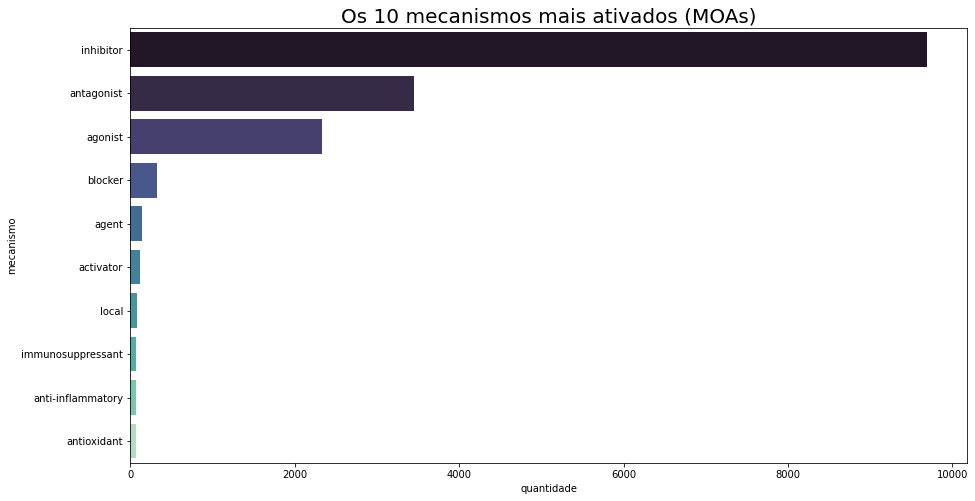

In [8]:
fig, ax = plt.subplots(1,1,figsize=(15,8))
sns.barplot(data = moas_top.head(10),
            y='mecanismo',
            x='quantidade', 
            ax=ax, 
            orient='h',
            palette='mako')
ax.set_title("Os 10 mecanismos mais ativados (MOAs)", fontsize=20)

plt.show()

# Desafio 02: Criar a coluna eh_controle para quando na linha tratamento == com_controle

In [10]:
dados_combinados['eh_controle'] =  np.where(dados_combinados['tratamento']=='com_droga', '1', '0')
dados_combinados.head(15)

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99,n_moa,ativo_moa,eh_controle
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176,1,True,1
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371,0,False,1
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931,3,True,1
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154,0,False,1
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125,1,True,1
5,id_001762a82,com_droga,24,D1,e06749542,-0.6111,0.2941,-0.9901,0.2277,1.2810,0.5203,0.0543,-0.2225,-0.1586,0.4289,0.0361,0.3543,0.8310,-0.9129,0.7677,-0.2512,0.7087,0.0481,-0.4486,1.2570,1.2550,0.3359,-0.5103,-0.2993,-1.1950,-0.3208,-0.1187,1.0030,0.9133,0.0376,0.3015,-0.9578,0.5354,1.1360,1.1310,...,0.9889,0.5017,2.0020,0.8918,0.4290,0.0716,0.8465,0.6596,1.3710,1.0580,1.7570,1.0030,0.2152,1.6920,-0.2930,1.4590,1.0950,0.5854,1.7270,0.5580,1.3090,1.0100,0.6980,0.5455,1.0170,1.2910,1.5430,1.8390,1.1570,-1.0120,1.9010,1.4270,0.4519,1.2120,0.3765,0.7848,1.3990,1,True,1
6,id_001bd861f,com_droga,24,D2,746ca1f5a,2.044

# Desafio 03: Criar três colunas para indicar o tempo 24, 48, 72

Vamos utilizar a mesma estratégia do desáfio anterior.

In [11]:
dados_combinados['eh_24'] = np.where(dados_combinados['tempo']== 24, '1', '0')
dados_combinados['eh_48'] = np.where(dados_combinados['tempo']== 48, '1', '0')
dados_combinados['eh_72'] = np.where(dados_combinados['tempo']== 72, '1', '0')

In [12]:
dados_combinados[['tempo', 'eh_24', 'eh_48', 'eh_72']].head(15)

,tempo,eh_24,eh_48,eh_72
0,24,1,0,0
1,72,0,0,1
2,48,0,1,0
3,48,0,1,0
4,72,0,0,1
5,24,1,0,0
6,24,1,0,0
7,48,0,1,0
8,48,0,1,0
9,48,0,1,0


# Desafio 04: Estudar sobre combinações de DF https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html

# Desafio 05: Fazer análise mais detalhada considerando tempo e dose, para comparar as distribuições (Escolher uma droga e comparar com controle)

In [14]:
compostos_top_5 = dados_combinados['droga'].value_counts().index[0:5]

In [26]:
compostos_top_5

Index(['cacb2b860', '87d714366', '9f80f3f77', '8b87a7a83', '5628cb3ee'], dtype='object')

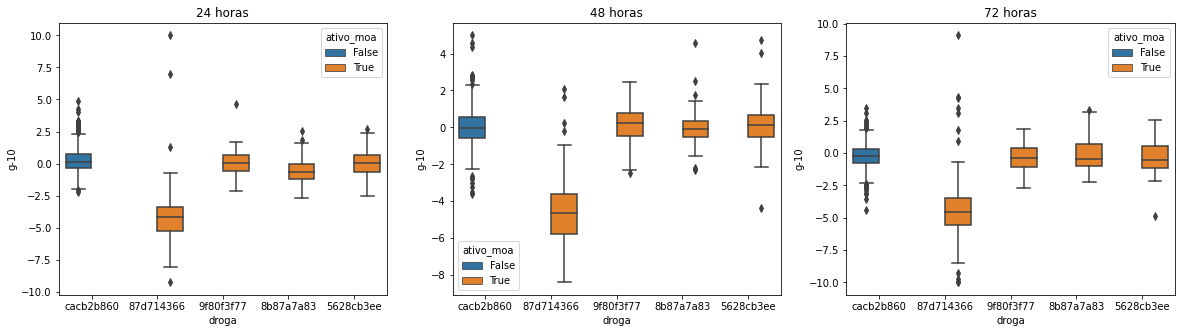

In [20]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(20,5))

sns.boxplot(data = dados_combinados.query('droga in @compostos_top_5 & tempo == 24'), y= 'g-10', x='droga',
            hue='ativo_moa', order=compostos_top_5, ax=ax1).set_title('24 horas')
sns.boxplot(data = dados_combinados.query('droga in @compostos_top_5 & tempo == 48'), y= 'g-10', x='droga',
            hue='ativo_moa', order=compostos_top_5, ax=ax2).set_title('48 horas')
sns.boxplot(data = dados_combinados.query('droga in @compostos_top_5 & tempo == 72'), y= 'g-10', x='droga',
            hue='ativo_moa', order=compostos_top_5, ax=ax3).set_title('72 horas')
plt.show()

O gene g-10 tem uma resposta bem parecida em todos os tempos. Com o composto 87d714366, os dados ficam mais dispersos em relação a mediana.

# Desafio 06: Descobrir se tem algum composto que dependendo da configuração do experimento, ativa ou não ativa algum MOA

Vamos analisar os cinco compostos mais utilizados.

<Figure size 1152x792 with 0 Axes>

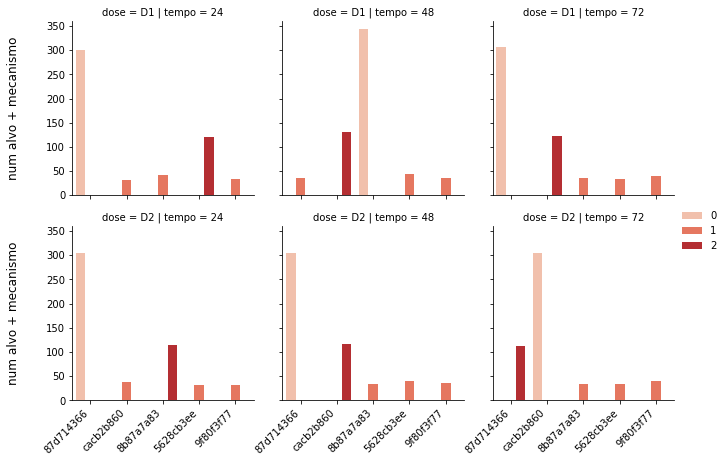

In [27]:
plt.figure(figsize = (16,11))
g = sns.FacetGrid(dados_combinados.loc[dados_combinados['droga'].isin(compostos_top_5)], row = 'dose', col = 'tempo')
g = g.map_dataframe(sns.countplot, x = 'droga', hue = 'n_moa', palette = 'Reds')
g.set_xticklabels(rotation = 45, horizontalalignment = 'right')
g.set_ylabels( 'num alvo + mecanismo',fontsize = 12, labelpad = 26)
g.add_legend()
plt.show()

# Desafio 07: Descobrir se tem algum composto que dependendo da configuração do experimento, ativa MOAs diferentes

In [28]:
dados_combinados.groupby(by='droga')['n_moa'].nunique().reset_index().sort_values('n_moa', ascending=False)

,droga,n_moa
0,00199ff52,1
2197,b0b0fec1d,1
2187,afafe3ca9,1
2188,afd0dbace,1
2189,afed0fc6d,1
...,...,...
1099,5aa46f542,1
1100,5ab0bda1e,1
1101,5ab704064,1
1102,5ac378d8a,1


In [30]:
dados_combinados.groupby(by='droga')['n_moa'].nunique().reset_index().sort_values('n_moa', ascending=False)['n_moa'].unique()

array([1])

Usando a função nunique nos dados agrupados por droga e ordenando o resultado, verificamos que cada droga ativa apenas 1 moa.

# Desafio 08: Resumo do que você aprendeu com os dados

Nessa aula aprendemos a juntar dataframes e fazer análises mais detalhadas com os dados combinados.